In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
data=pd.read_csv("amazon_laptop_price_dataset.csv")

In [89]:
data.head()

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price_USD
0,MSI,AMD Ryzen 3,4,512,macOS,AMD Radeon,4.2,1092.04
1,Lenovo,Intel i7,32,128,macOS,NVIDIA GTX 1650,3.1,1934.84
2,Asus,AMD Ryzen 7,8,256,Windows 10,Integrated,3.6,758.86
3,Dell,Intel i7,16,512,Windows 11,AMD Radeon,3.6,1430.88
4,MSI,AMD Ryzen 7,8,512,Windows 11,NVIDIA RTX 3050,3.8,1457.77


In [90]:
#convert the price column to numeric
data['Price_USD']=data['Price_USD']*92
data.head()

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price_USD
0,MSI,AMD Ryzen 3,4,512,macOS,AMD Radeon,4.2,100467.68
1,Lenovo,Intel i7,32,128,macOS,NVIDIA GTX 1650,3.1,178005.28
2,Asus,AMD Ryzen 7,8,256,Windows 10,Integrated,3.6,69815.12
3,Dell,Intel i7,16,512,Windows 11,AMD Radeon,3.6,131640.96
4,MSI,AMD Ryzen 7,8,512,Windows 11,NVIDIA RTX 3050,3.8,134114.84


In [91]:
#replace column names with more descriptive names
data.rename(columns={'Price_USD':'Price'},inplace=True)

In [92]:
data

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price
0,MSI,AMD Ryzen 3,4,512,macOS,AMD Radeon,4.2,100467.68
1,Lenovo,Intel i7,32,128,macOS,NVIDIA GTX 1650,3.1,178005.28
2,Asus,AMD Ryzen 7,8,256,Windows 10,Integrated,3.6,69815.12
3,Dell,Intel i7,16,512,Windows 11,AMD Radeon,3.6,131640.96
4,MSI,AMD Ryzen 7,8,512,Windows 11,NVIDIA RTX 3050,3.8,134114.84
...,...,...,...,...,...,...,...,...
995,Dell,Intel i5,8,1024,Windows 10,NVIDIA GTX 1650,3.7,156448.76
996,Apple,AMD Ryzen 5,8,256,Windows 10,NVIDIA GTX 1650,3.1,141207.12
997,Apple,AMD Ryzen 5,32,512,Windows 10,Integrated,3.6,193303.96
998,Dell,AMD Ryzen 5,32,128,Windows 11,Integrated,3.3,118588.92


In [93]:
#data preprocessing
print(data.isnull().sum())

Brand               0
Processor           0
RAM_GB              0
Storage_GB          0
Operating_System    0
GPU                 0
Rating              0
Price               0
dtype: int64


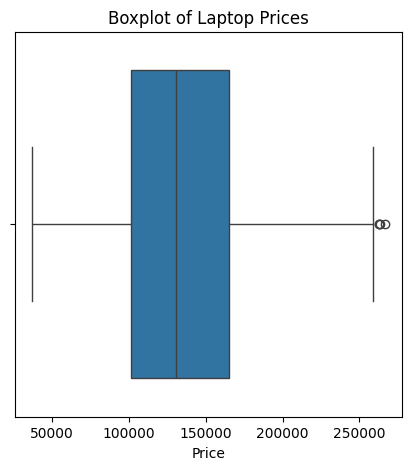

In [94]:
plt.figure(figsize=(5,5))
sns.boxplot(x=data['Price'])
plt.title("Boxplot of Laptop Prices")
plt.xlabel("Price")
plt.show()

In [95]:
#display which row has outlier
q1=data['Price'].quantile(0.25)
q3=data['Price'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
outliers=data[(data['Price']<lower_bound) | (data['Price']>upper_bound)]
print(outliers)


     Brand    Processor  RAM_GB  Storage_GB Operating_System              GPU  \
101  Apple     Intel i7      16        1024            macOS  NVIDIA RTX 3050   
598  Apple     Intel i7      32        1024            macOS       Integrated   
617  Apple  AMD Ryzen 7      32        1024            macOS       Integrated   
865     HP     Intel i7      32        1024            macOS  NVIDIA RTX 3050   

     Rating      Price  
101     4.1  263086.88  
598     4.5  266510.20  
617     5.0  263137.48  
865     3.1  262990.28  


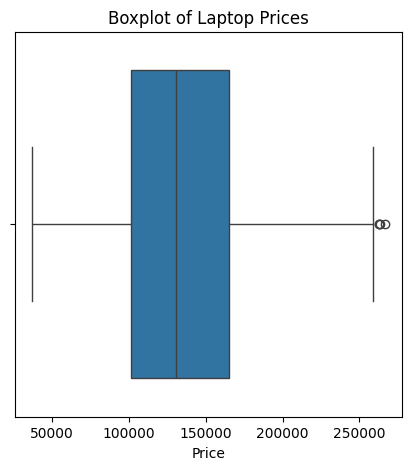

In [96]:
plt.figure(figsize=(5,5))
sns.boxplot(x=data['Price'])
plt.title("Boxplot of Laptop Prices")
plt.xlabel("Price")
plt.show()

In [97]:
#remove rows and keep outliers predataset
data_no_outliers=data[(data['Price']>=lower_bound) & (data['Price']<=upper_bound)]
data_no_outliers.head()

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price
0,MSI,AMD Ryzen 3,4,512,macOS,AMD Radeon,4.2,100467.68
1,Lenovo,Intel i7,32,128,macOS,NVIDIA GTX 1650,3.1,178005.28
2,Asus,AMD Ryzen 7,8,256,Windows 10,Integrated,3.6,69815.12
3,Dell,Intel i7,16,512,Windows 11,AMD Radeon,3.6,131640.96
4,MSI,AMD Ryzen 7,8,512,Windows 11,NVIDIA RTX 3050,3.8,134114.84


In [98]:
#take columns and display unique values
print(data_no_outliers['Brand'].unique())
print(data_no_outliers['Processor'].unique())
print(data_no_outliers['RAM_GB'].unique())
print(data_no_outliers['Storage_GB'].unique())
print(data_no_outliers['Operating_System'].unique())
print(data_no_outliers['GPU'].unique())
print(data_no_outliers['Rating'].unique())


['MSI' 'Lenovo' 'Asus' 'Dell' 'Acer' 'Apple' 'HP']
['AMD Ryzen 3' 'Intel i7' 'AMD Ryzen 7' 'Intel i5' 'Intel i3'
 'AMD Ryzen 5']
[ 4 32  8 16]
[ 512  128  256 1024]
['macOS' 'Windows 10' 'Windows 11']
['AMD Radeon' 'NVIDIA GTX 1650' 'Integrated' 'NVIDIA RTX 3050']
[4.2 3.1 3.6 3.8 3.  4.8 4.  3.7 4.3 3.9 3.5 4.1 3.2 3.3 4.4 4.7 4.9 4.6
 4.5 5.  3.4]


In [99]:
#check value count of operating system column
print(data['Operating_System'].value_counts())

Operating_System
Windows 11    345
macOS         329
Windows 10    326
Name: count, dtype: int64


In [100]:
#change the value in operating system column to more general name
data['Operating_System']=data['Operating_System'].replace({'Windows 10':'Windows','Windows 11':'Windows','Mac OS':'MacOS'})


In [101]:
data

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price
0,MSI,AMD Ryzen 3,4,512,macOS,AMD Radeon,4.2,100467.68
1,Lenovo,Intel i7,32,128,macOS,NVIDIA GTX 1650,3.1,178005.28
2,Asus,AMD Ryzen 7,8,256,Windows,Integrated,3.6,69815.12
3,Dell,Intel i7,16,512,Windows,AMD Radeon,3.6,131640.96
4,MSI,AMD Ryzen 7,8,512,Windows,NVIDIA RTX 3050,3.8,134114.84
...,...,...,...,...,...,...,...,...
995,Dell,Intel i5,8,1024,Windows,NVIDIA GTX 1650,3.7,156448.76
996,Apple,AMD Ryzen 5,8,256,Windows,NVIDIA GTX 1650,3.1,141207.12
997,Apple,AMD Ryzen 5,32,512,Windows,Integrated,3.6,193303.96
998,Dell,AMD Ryzen 5,32,128,Windows,Integrated,3.3,118588.92


In [102]:
#convert i3 to1, i5 to 2, i7 to 3, i9 to 4 ryzen3 to 1 in processor column
data['Processor'] = data['Processor'].replace({'Intel i3': 1, 'Intel i5': 2, 'Intel i7': 3, 'i9': 4,'AMD Ryzen 3': 1, 'AMD Ryzen 5': 2, 'AMD Ryzen 7': 3})
data['Processor'].value_counts()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24044\4285377520.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Processor'] = data['Processor'].replace({'Intel i3': 1, 'Intel i5': 2, 'Intel i7': 3, 'i9': 4,'AMD Ryzen 3': 1, 'AMD Ryzen 5': 2, 'AMD Ryzen 7': 3})


Processor
2    349
3    343
1    308
Name: count, dtype: int64

In [103]:
data

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price
0,MSI,1,4,512,macOS,AMD Radeon,4.2,100467.68
1,Lenovo,3,32,128,macOS,NVIDIA GTX 1650,3.1,178005.28
2,Asus,3,8,256,Windows,Integrated,3.6,69815.12
3,Dell,3,16,512,Windows,AMD Radeon,3.6,131640.96
4,MSI,3,8,512,Windows,NVIDIA RTX 3050,3.8,134114.84
...,...,...,...,...,...,...,...,...
995,Dell,2,8,1024,Windows,NVIDIA GTX 1650,3.7,156448.76
996,Apple,2,8,256,Windows,NVIDIA GTX 1650,3.1,141207.12
997,Apple,2,32,512,Windows,Integrated,3.6,193303.96
998,Dell,2,32,128,Windows,Integrated,3.3,118588.92


In [104]:
#
gpu_map = {
    'Integrated': 0,
    'AMD Radeon': 1,
    'NVIDIA GTX 1650': 2,
    'NVIDIA RTX 3050': 3
}
data['GPU_Level'] = data['GPU'].map(gpu_map)
data['GPU_Level'].value_counts()


GPU_Level
0    279
1    268
3    246
2    207
Name: count, dtype: int64

In [105]:
mapping={'AMD Radeon':1,'NVIDIA GTX 1650':2,'Integrated':0,'NVIDIA RTX 3050':3}
data['GPU']=data['GPU'].map(mapping)
data['GPU'].unique()

array([1, 2, 0, 3])

In [106]:
# brand column encoding using one hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
brand_encoded=encoder.fit_transform(data[['Brand']])
brand_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(1000, 7))

In [107]:
#task1:brand column convert into number using one hot encoding
data=pd.get_dummies(data,columns=['Brand'])
data

,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price,GPU_Level,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,Brand_MSI
0,1,4,512,macOS,1,4.2,100467.68,1,False,False,False,False,False,False,True
1,3,32,128,macOS,2,3.1,178005.28,2,False,False,False,False,False,True,False
2,3,8,256,Windows,0,3.6,69815.12,0,False,False,True,False,False,False,False
3,3,16,512,Windows,1,3.6,131640.96,1,False,False,False,True,False,False,False
4,3,8,512,Windows,3,3.8,134114.84,3,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,8,1024,Windows,2,3.7,156448.76,2,False,False,False,True,False,False,False
996,2,8,256,Windows,2,3.1,141207.12,2,False,True,False,False,False,False,False
997,2,32,512,Windows,0,3.6,193303.96,0,False,True,False,False,False,False,False
998,2,32,128,Windows,0,3.3,118588.92,0,False,False,False,True,False,False,False


In [110]:
#task2:add brand_encoded in the dataframe
brand_encoded_df=pd.DataFrame(brand_encoded,columns=encoder.get_feature_names_out(['Brand']))
data=pd.concat([data,brand_encoded_df],axis=1)
data

,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price,GPU_Level,Brand_Acer,Brand_Apple,...,Brand_HP,Brand_Lenovo,Brand_MSI,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,Brand_MSI
0,1,4,512,macOS,1,4.2,100467.68,1,False,False,...,False,False,True,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,32,128,macOS,2,3.1,178005.28,2,False,False,...,False,True,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,8,256,Windows,0,3.6,69815.12,0,False,False,...,False,False,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,16,512,Windows,1,3.6,131640.96,1,False,False,...,False,False,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3,8,512,Windows,3,3.8,134114.84,3,False,False,...,False,False,True,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,8,1024,Windows,2,3.7,156448.76,2,False,False,...,False,False,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,2,8,256,Windows,2,3.1,141207.12,2,False,True,...,False,False,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0
997,2,32,512,Windows,0,3.6,193303.96,0,False,True,...,False,False,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0
998,2,32,128,Windows,0,3.3,118588.92,0,False,False,...,False,False,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#task3:all brand col convert into integer
data['Brand_Apple'] = data['Brand_Apple'].astype(int)
data['Brand_Dell'] = data['Brand_Dell'].astype(int)
data

,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price,GPU_Level,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,Brand_MSI
0,1,4,512,macOS,1,4.2,100467.68,1,False,0,False,0,False,False,True
1,3,32,128,macOS,2,3.1,178005.28,2,False,0,False,0,False,True,False
2,3,8,256,Windows,0,3.6,69815.12,0,False,0,True,0,False,False,False
3,3,16,512,Windows,1,3.6,131640.96,1,False,0,False,1,False,False,False
4,3,8,512,Windows,3,3.8,134114.84,3,False,0,False,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,8,1024,Windows,2,3.7,156448.76,2,False,0,False,1,False,False,False
996,2,8,256,Windows,2,3.1,141207.12,2,False,1,False,0,False,False,False
997,2,32,512,Windows,0,3.6,193303.96,0,False,1,False,0,False,False,False
998,2,32,128,Windows,0,3.3,118588.92,0,False,0,False,1,False,False,False


In [ ]:
#task4:divide data x and y
X=data.drop('Price',axis=1)
y=data['Price']
X
y


0      100467.68
1      178005.28
2       69815.12
3      131640.96
4      134114.84
         ...    
995    156448.76
996    141207.12
997    193303.96
998    118588.92
999     96259.60
Name: Price, Length: 1000, dtype: float64

In [ ]:
#task5:split data into train and test
#split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_test,y_train,y_test


(     Processor  RAM_GB  Storage_GB Operating_System  GPU  Rating  GPU_Level  \
 29           3       8         512            macOS    3     3.7          3   
 535          2       8        1024          Windows    0     3.7          0   
 695          3       4         128          Windows    0     3.6          0   
 557          1      16         512          Windows    2     4.3          2   
 836          2       4         128            macOS    3     4.6          3   
 ..         ...     ...         ...              ...  ...     ...        ...   
 106          1       8         512          Windows    3     4.8          3   
 270          3       8         256          Windows    0     3.8          0   
 860          2       4         512          Windows    0     4.2          0   
 435          3       4         512          Windows    1     3.1          1   
 102          3       8        1024          Windows    3     4.7          3   
 
      Brand_Acer  Brand_Apple  Brand_A

In [ ]:
# task6:train model,load model,fit model,predict
# Train model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
#load model
import joblib
joblib.dump(model, 'laptop_price_model.pkl')
#fit model
model.fit(X_train, y_train)
#predict the test data
y_pred = model.predict(X_test)
y_pred  # predict

array([110055.51671385,  85393.10464479, 218413.4141592 , 105545.11872873,
       128262.01842159, 235288.32928765,  97132.57669581,  73020.0505963 ,
       110079.26671289, 243720.25509215, 169034.75968386, 145555.15205619,
       134996.83082162, 226089.62035241, 107247.92705248, 122952.31746829,
        92126.60028811, 139620.56596127, 157665.04568632,  92501.35075766,
       113159.91287937, 113335.72723315, 193815.45555623, 185448.89470881,
        84447.10279654, 151576.08536333, 255356.24692273, 175316.75614165,
        54560.49818293, 180885.85504061, 186592.25944517,  92168.84462131,
       226200.42577615, 157076.32355394, 117403.27746381, 120267.36040805,
        60781.42483893,  84456.56842303, 189010.91834096, 220804.74755101,
       192389.22695999, 194693.60367783, 195272.81931813, 160165.87247457,
       155851.78326699, 171079.87352666, 121028.54220108, 131797.66491919,
       132564.44288075, 142087.76021777,  75161.54129605, 108678.23693947,
       108805.71572148, 1

In [ ]:
#task7:find the mse,mae
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 53295048.96861835
Mean Absolute Error: 6012.659026628003


In [ ]:
#task8:find r2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9741375869647644
